1.Connect to RAND data

In [15]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
!ls("/content/gdrive/My Drive/")

/bin/bash: -c: line 0: syntax error near unexpected token `"/content/gdrive/My Drive/"'
/bin/bash: -c: line 0: `ls("/content/gdrive/My Drive/")'


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
df=pd.read_csv("/content/gdrive/My Drive/RAND.csv")

In [18]:
df.head()

,Title,ResearchQuestions,Summary,KeyFindings,Recommendations
0,The Role of U.S. Airpower in Defeating ISIS\n,\t\n,\tBlunting ISIS's momentum in Syria\n\tTargeti...,\tAirpower played a critical role in OIR based...,\tThe joint force should revise its targeting ...
1,Department of the Air Force Civilian Compensat...,What constraints does the Air Force operate un...,The U.S. Department of the Air Force has appro...,\tThe Air Force has not yet developed internal...,\tDevelop a policy and approach for determinin...
2,The Air War Against the Islamic State The Role...,What happened during the air campaign against ...,Airpower played a pivotal role in the U.S.-led...,\tAirpower played a critical role in Operation...,\tThe joint force should revise its targeting ...
3,Managing Risk in Globalized Supply Chains\n,How can USAF develop a repeatable SCRM process...,"In recent years, policymakers have increased e...",\tUSAF policies and responsibilities for SCRM ...,"\tUSAF, and DoD more broadly, may benefit from..."
4,Fighter Basing Options to Improve Access to Ad...,What squadron restationing and range upgrade p...,The U.S. Air Force (USAF) has determined that ...,Range upgrades alone provide only a portion of...,\tPrioritize upgrading a range near an F-22 ba...


2. Data Cleaning

In [21]:
import re

In [31]:
df=pd.DataFrame(df)

In [37]:
df.columns= ['Title', 'ResearchQuestions', 'Summary', 'KeyFindings','Recommendations']

In [40]:
# Remove punctuation 
import re
df2=pd.DataFrame()
df2["title"] = df["Title"].apply(lambda text: re.sub('[^A-Za-z0-9 ]+', '', text))
df2["question"] = df['ResearchQuestions'].apply(lambda text: re.sub('[^A-Za-z0-9 ]+', '', text))
df2["summary"] = df['Summary'].apply(lambda text: re.sub('[^A-Za-z0-9 ]+', '', text))
df2["keyfinding"] = df['KeyFindings'].apply(lambda text: re.sub('[^A-Za-z0-9 ]+', '', str(text)))
df2["recom"] = df['Recommendations'].apply(lambda text: re.sub('[^A-Za-z0-9 ]+', '', str(text)))
df2.head()

,title,question,summary,keyfinding,recom
0,The Role of US Airpower in Defeating ISIS,,BluntingISISs momentum in SyriaTargetingISISs ...,Airpower played a critical role inOIRbased on ...,The joint force should revise its targeting do...
1,Department of the Air Force Civilian Compensat...,What constraints does the Air Force operate un...,The US Department of the Air Force has approxi...,The Air Force has not yet developed internal s...,Develop a policy and approach for determining ...
2,The Air War Against the Islamic State The Role...,What happened during the air campaign against ...,Airpower played a pivotal role in the USled fi...,Airpower played a critical role in Operation I...,The joint force should revise its targeting do...
3,Managing Risk in Globalized Supply Chains,How can USAF develop a repeatable SCRM process...,In recent years policymakers have increased em...,USAF policies and responsibilities for SCRM ar...,USAF and DoD more broadly may benefit from an ...
4,Fighter Basing Options to Improve Access to Ad...,What squadron restationing and range upgrade p...,The US Air Force USAF has determined that its ...,Range upgrades alone provide only a portion of...,Prioritize upgrading a range near an F22 base ...


3. WordCloud

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

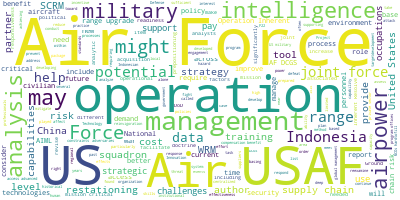

In [50]:
# Join the different processed titles together.
long_string = ','.join(list(df2["title"].values+df2["question"].values+df2["summary"].values+df2["keyfinding"].values+df2["recom"].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

 4. LDA 


In [81]:
df2["all"]= df2["title"]+df2["question"]+df2["summary"]+df2["keyfinding"]+df2["recom"]

In [168]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','said','mr','ms','would',"also"])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [196]:
data = df2["all"].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['role', 'us', 'airpower', 'defeating', 'momentum', 'cash', 'vehicleborne', 'improvised', 'explosive', 'device', 'vbied', 'attacks', 'mosulthe', 'importance', 'aerial', 'refueling', 'air', 'war', 'played', 'critical', 'role', 'inoirbased', 'strategy', 'put', 'local', 'partners', 'leaders', 'fight', 'destroy', 'caliphate']


In [86]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.008*"usaf" + 0.007*"range" + 0.007*"may" + 0.005*"restationing" + '
  '0.005*"us" + 0.005*"chain" + 0.005*"upgrades" + 0.005*"supply" + '
  '0.005*"air" + 0.005*"military"'),
 (1,
  '0.014*"force" + 0.012*"air" + 0.011*"us" + 0.009*"operations" + '
  '0.009*"joint" + 0.008*"airpower" + 0.008*"military" + 0.006*"united" + '
  '0.006*"inherent" + 0.005*"operation"'),
 (2,
  '0.009*"usaf" + 0.008*"force" + 0.008*"dcgs" + 0.007*"supply" + '
  '0.007*"intelligence" + 0.006*"us" + 0.006*"military" + 0.006*"could" + '
  '0.006*"air" + 0.006*"help"'),
 (3,
  '0.015*"air" + 0.010*"force" + 0.006*"usaf" + 0.006*"data" + 0.006*"us" + '
  '0.005*"access" + 0.005*"supply" + 0.005*"forces" + 0.005*"joint" + '
  '0.005*"military"'),
 (4,
  '0.018*"force" + 0.015*"air" + 0.010*"us" + 0.008*"management" + '
  '0.007*"military" + 0.006*"joint" + 0.006*"forces" + 0.005*"wrm" + '
  '0.005*"range" + 0.005*"operations"'),
 (5,
  '0.013*"air" + 0.008*"force" + 0.008*"management" + 0.008*"us" + 0.00

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

5. LDA Visualization

In [88]:
!pip install pyLDAvis

In [91]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [92]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared
#pyLDAvis.display(LDAvis_prepared)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.059022 -0.011470       1        1  26.811525
1     -0.001704  0.037913       2        1  13.669016
6     -0.001504 -0.013360       3        1  13.117376
4     -0.024932 -0.010277       4        1  12.504443
0     -0.026948 -0.019639       5        1  12.136684
7     -0.006593  0.011906       6        1  11.950354
5      0.002192  0.007083       7        1   9.807539
2      0.000467 -0.002156       8        1   0.003064, topic_info=          Term       Freq      Total Category  logprob  loglift
633      range   6.000000   6.000000  Default  30.0000  30.0000
78       joint  10.000000  10.000000  Default  29.0000  29.0000
1350       wrm   4.000000   4.000000  Default  28.0000  28.0000
5          air  19.000000  19.000000  Default  27.0000  27.0000
946       dcgs   5.000000   5.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
872   military   0.000074   8.375902   Topic8  -7.2048  -1.2397
332     ranges   0.000074   3.689117   Topic8  -7.2048  -0.4198
8     airpower   0.000074   7.961847   Topic8  -7.2048  -1.1891
651       scrm   0.000074   4.719040   Topic8  -7.2051  -0.6663
946       dcgs   0.000074   5.095905   Topic8  -7.2051  -0.7432

[385 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
515       1  0.198737       access
515       5  0.397475       access
807       1  0.592363    achieving
517       4  0.622749  acquisition
690       5  0.584630     advanced
...     ...       ...          ...
158       7  0.237627          war
684       4  0.406866       weapon
1260      3  0.449590         well
1262      3  0.402546  willingness
1350      7  0.621491          wrm

[370 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 5, 1, 8, 6, 3])